Kelompok 1
1. Farrel Amroe Azhari (21/476754/PA/20600)
2. Shevrila Vilnafa Bilbina S. (22/492511/PA/21118)
3. Davin Jason Evan Raharjo (22/493367/PA/21184)
4. Dinda Hana Zhafira (22/494038/PA/21240)
5. Teuku Hanif Tsabit Al-Azmi (22/503608/PA/21650)

<div style="
  width: 100%;
  height: 30px;
  background: linear-gradient(to right, #5f99bd, #81babe);
  border-radius: 20px;
  display: flex;
  justify-content: center;
  align-items: center;
  color: black;
  font-size: 18px;
">Airline Passenger Satisfaction</div>

There is the following information about the passengers of some airline:

1. **Gender**: male or female
2. **Customer type**: regular or non-regular airline customer
3. **Age**: the actual age of the passenger
4. **Type of travel**: the purpose of the passenger's flight (personal or business travel)
5. **Class**: business, economy, economy plus
6. **Flight** distance
7. **Inflight wifi service**: satisfaction level with Wi-Fi service on board (0: not rated; 1-5)
8. **Departure/Arrival time convenient**: departure/arrival time satisfaction level (0: not rated; 1-5)
9. **Ease of Online booking**: online booking satisfaction rate (0: not rated; 1-5)
10. **Gate location**: level of satisfaction with the gate location (0: not rated; 1-5)
11. **Food and drink**: food and drink satisfaction level (0: not rated; 1-5)
12. **Online boarding**: satisfaction level with online boarding (0: not rated; 1-5)
13. **Seat comfort**: seat satisfaction level (0: not rated; 1-5)
14. **Inflight entertainment**: satisfaction with inflight entertainment (0: not rated; 1-5)
15. **On-board service**: level of satisfaction with on-board service (0: not rated; 1-5)
16. **Leg room service**: level of satisfaction with leg room service (0: not rated; 1-5)
17. **Baggage handling**: level of satisfaction with baggage handling (0: not rated; 1-5)
18. **Checkin service**: level of satisfaction with checkin service (0: not rated; 1-5)
19. **Inflight service**: level of satisfaction with inflight service (0: not rated; 1-5)
20. **Cleanliness**: level of satisfaction with cleanliness (0: not rated; 1-5)
21. **Departure delay in minutes**
22. **Arrival delay in minutes**

This data set contains a survey on air passenger satisfaction. The following classification problem is set:

It is necessary to predict which of the two levels of satisfaction with the airline the passenger belongs to:

1. Satisfaction
2. Neutral or dissatisfied

<div style="
  width: 100%;
  height: 30px;
  background: linear-gradient(to right, #5f99bd, #81babe);
  border-radius: 20px;
  display: flex;
  justify-content: center;
  align-items: center;
  color: black;
  font-size: 18px;
">Reading data</div>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras_tuner as kt
import os
import shutil

from tensorflow import keras
from keras import Input
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.losses import BinaryCrossentropy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, \
                            precision_score, ConfusionMatrixDisplay

In [3]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

df_concat = df1._append(df2, ignore_index=True)
df_concat.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
print(f'Table shape: {df_concat.shape}')

Table shape: (129880, 25)


In [5]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

From the info above, we notice:
1. The `Arrival Delay in Minutes` and `Departure Delay in Minutes` columns have 393 missing values.
2. The first 2 features are useless and will not affect the classification.
3. Many columns contain categorical values but are of type `object` or `int64`. We will convert them to `category` type, which are more efficient in terms of memory usage.

In [6]:
df_concat = df_concat.iloc[:, 2:]

In [7]:
categorical_columns = [0, 1, 3, 4] + list(range(6, 20))
df_concat[df_concat.columns[categorical_columns]] = df_concat[df_concat.columns[categorical_columns]].astype('category')

Now the dataset information looks like this:

In [8]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             129880 non-null  category
 1   Customer Type                      129880 non-null  category
 2   Age                                129880 non-null  int64   
 3   Type of Travel                     129880 non-null  category
 4   Class                              129880 non-null  category
 5   Flight Distance                    129880 non-null  int64   
 6   Inflight wifi service              129880 non-null  category
 7   Departure/Arrival time convenient  129880 non-null  category
 8   Ease of Online booking             129880 non-null  category
 9   Gate location                      129880 non-null  category
 10  Food and drink                     129880 non-null  category
 11  Online boarding           

The memory usage has been reduced from 24.8 MB to 7.2 MB.

The first 22 columns are the features, and the last column is the target variable.

<div style="
  width: 100%;
  height: 30px;
  background: linear-gradient(to right, #5f99bd, #81babe);
  border-radius: 20px;
  display: flex;
  justify-content: center;
  align-items: center;
  color: black;
  font-size: 18px;
">Data Visualization</div>

We will visualize the data to understand the distribution of the features and the relationship between the features and the target variable.

We will first get the summary information about quantitative features.

In [9]:
df_concat.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,14.713713,15.091129
std,15.119360,997.452477,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,844.000000,0.000000,0.000000
75%,51.000000,1744.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


For each quantitative attribute, we got the the mean, standard deviation, minimum, maximum, and the quartiles.

Now, we will get the summary information about categorical features.

In [10]:
df_concat.describe(include='category')

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6
top,Female,Loyal Customer,Business travel,Business,2,4,3,3,4,4,4,4,4,4,4,4,4,4
freq,65899,106100,89693,62160,32320,31880,30393,35717,30563,38468,39756,36791,38703,35886,46761,36333,47323,33969


For each categorical attribute, we got the total number of values, number of unique values, most frequently occuring element, and it's frequency.

Now, let's take a look at the ratio of the values of the target variable.

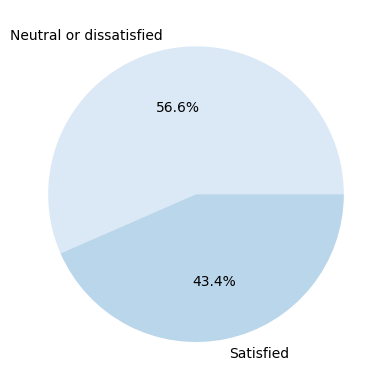

In [10]:
plt.pie(df_concat['satisfaction'].value_counts(), labels=['Neutral or dissatisfied', 'Satisfied'], colors=sns.color_palette('Blues'), autopct='%1.1f%%')
pass

From the above pie chart, the selection is more or less balanced, so there is no need for resampling.

Now, we will calculate the correlation for the quantitative features.

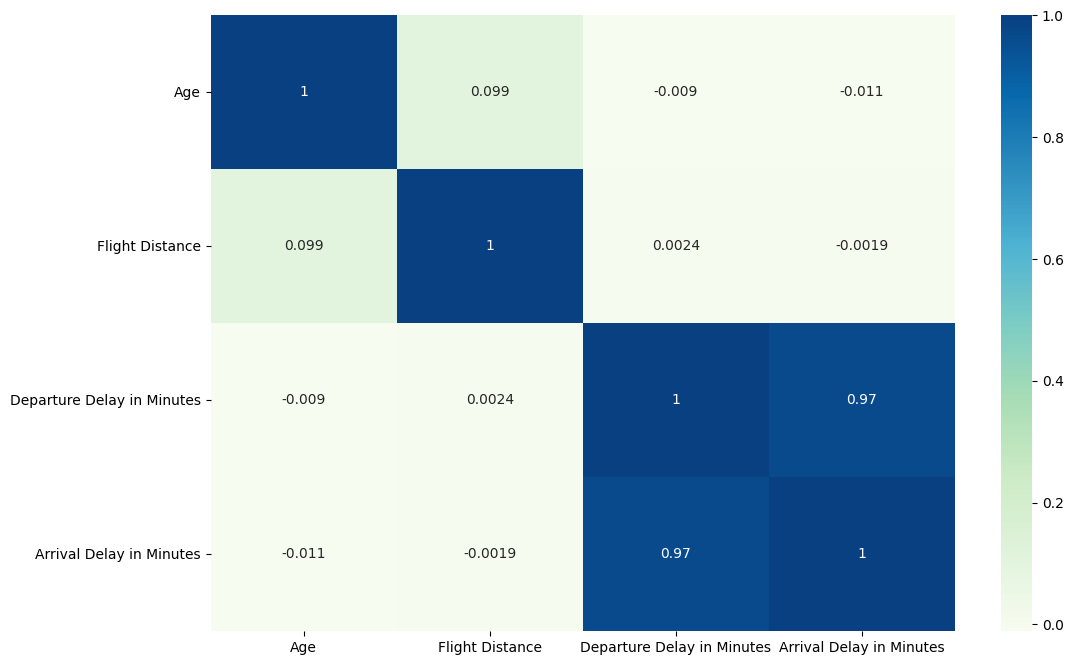

In [11]:
corr_matrix = df_concat.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='GnBu')
pass

We can observe that the `Arrival Delay in Minutes` and `Departure Delay in Minutes` columns are highly correlated, with a correlation coefficient of 0.97.

Now, let's consider the ratio of values for each categorical feature.

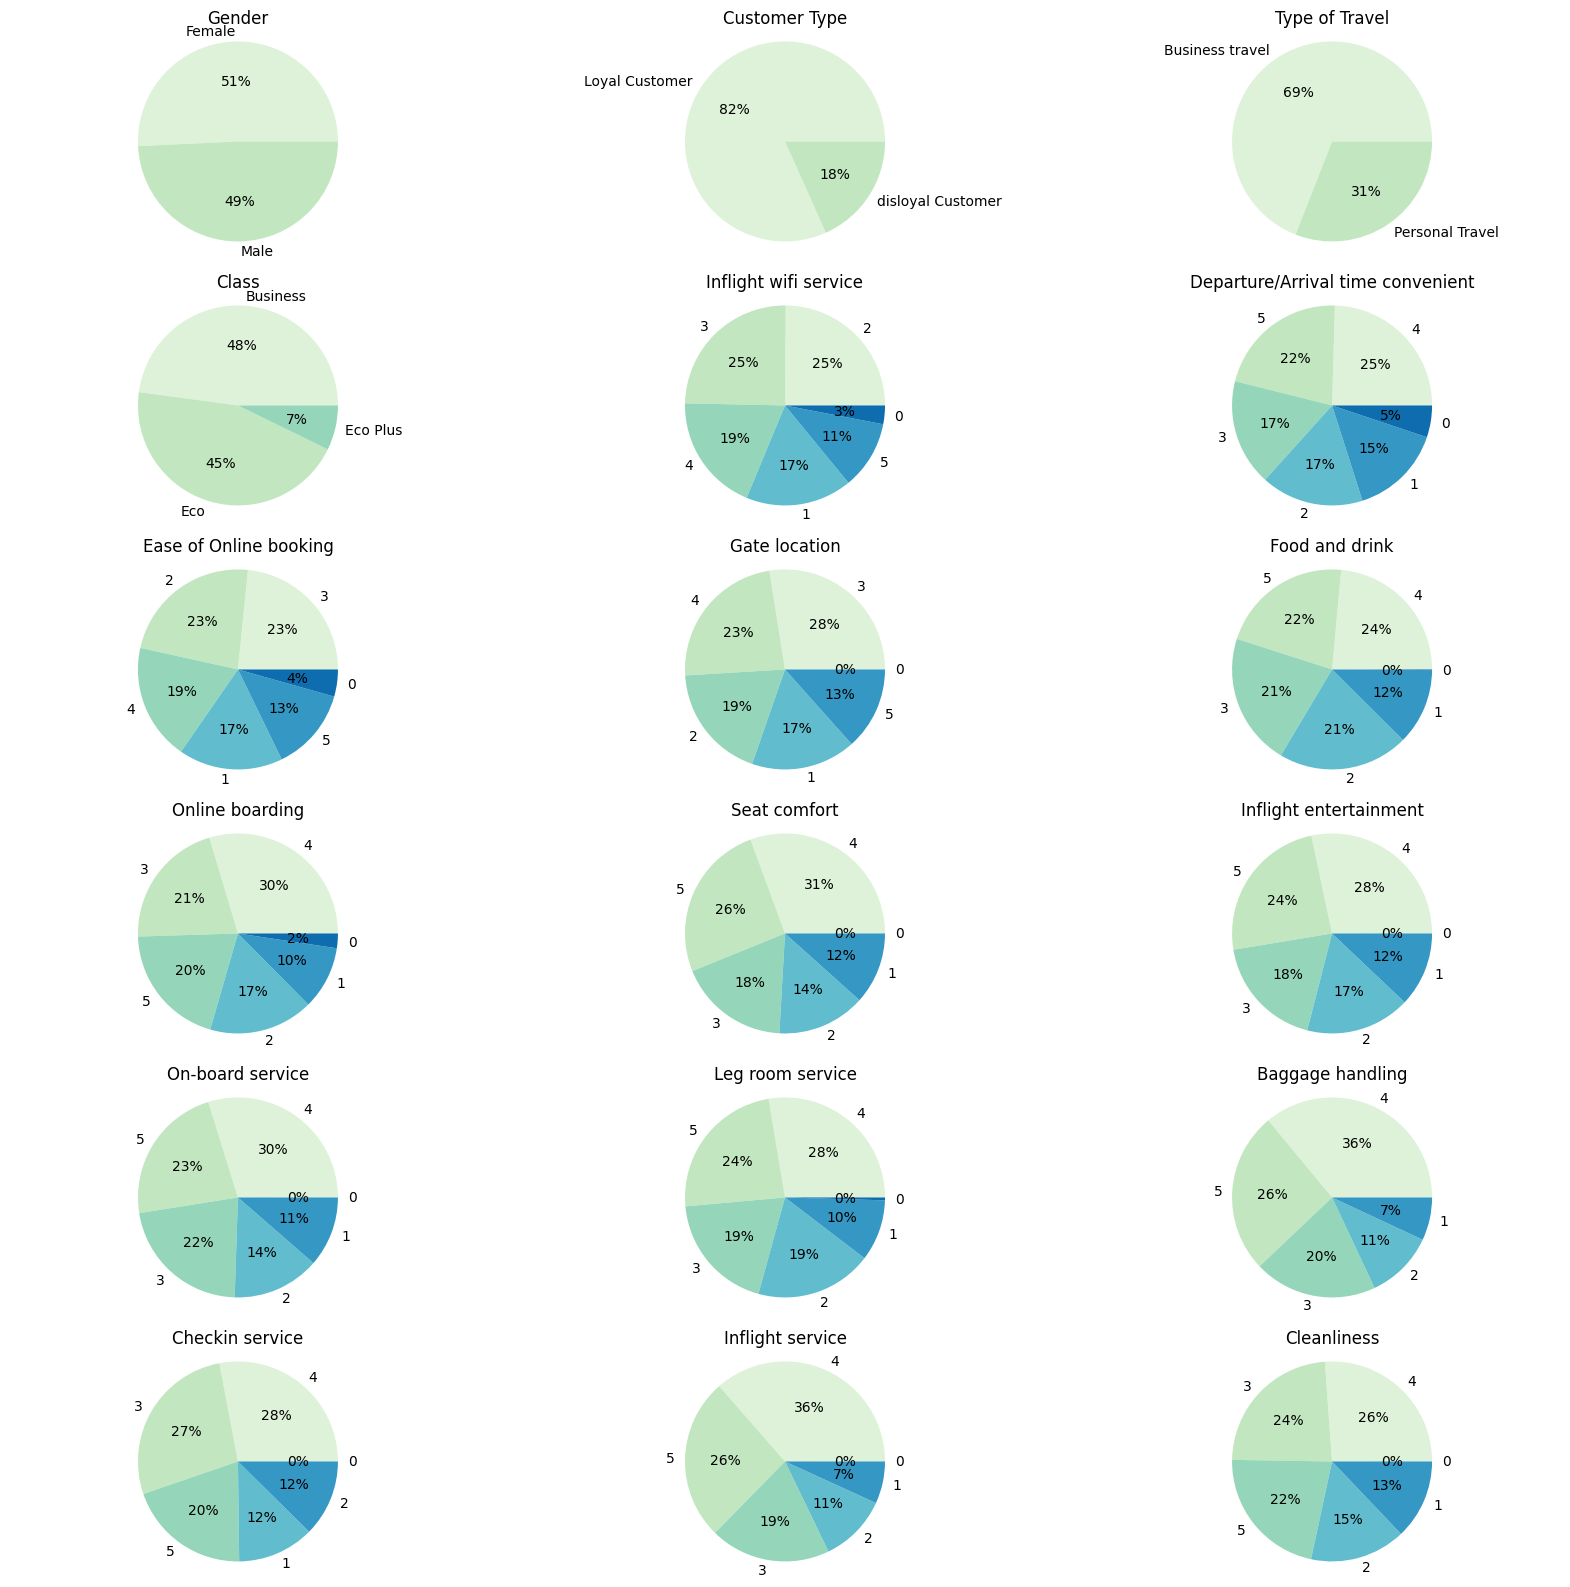

In [12]:
categorical_data = df_concat.iloc[:, categorical_columns]
fig, axes = plt.subplots(6, 3, figsize=(20, 20))

for i, col in enumerate(categorical_data):
  column_values = categorical_data[col].value_counts()
  labels = column_values.index
  sizes = column_values.values
  axes[i // 3, i % 3].pie(sizes, labels=labels, autopct='%1.0f%%', colors=sns.color_palette('GnBu'))
  axes[i // 3, i % 3].set_title(col)
  axes[i // 3, i % 3].axis('equal')

pass

From the above pie charts, we can conclude that:
- The number of men and women is approximately equal.
- Vast majority of the airline customers are regular/loyal customers.
- Majority of the passengers flew for business purposes.
- Almost half of the passengers flew in the business class.
- Around 60% of passengers were satisfied with the luggage transport service (rating 4 or 5).
- Around 50% of passengers were comfortable sitting in their seats (rating 4 or 5).

Now, let's visualize the relationship between the features and the target variable. We will start with the quantitative features.

In [13]:
col_1 = ['Age', 'Flight Distance']
col_2 = ['Departure Delay in Minutes', 'Arrival Delay in Minutes']

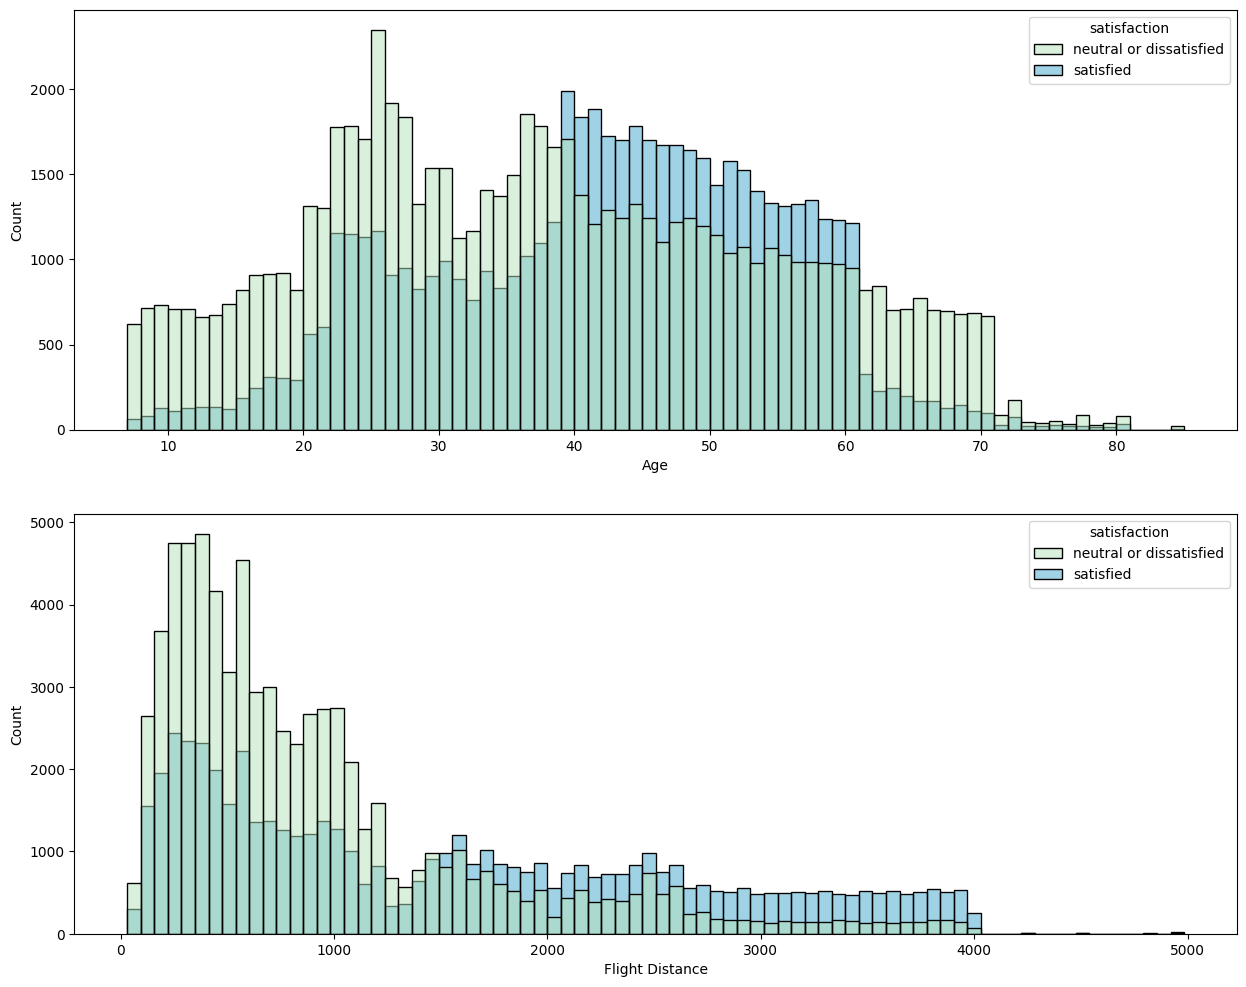

In [14]:
fig, axes = plt.subplots(len(col_1), 1, figsize=(15, 12))

for i, col in enumerate(col_1):
  sns.histplot(data=df_concat, x=col, ax=axes[i], hue='satisfaction', palette='GnBu', bins=78)

pass

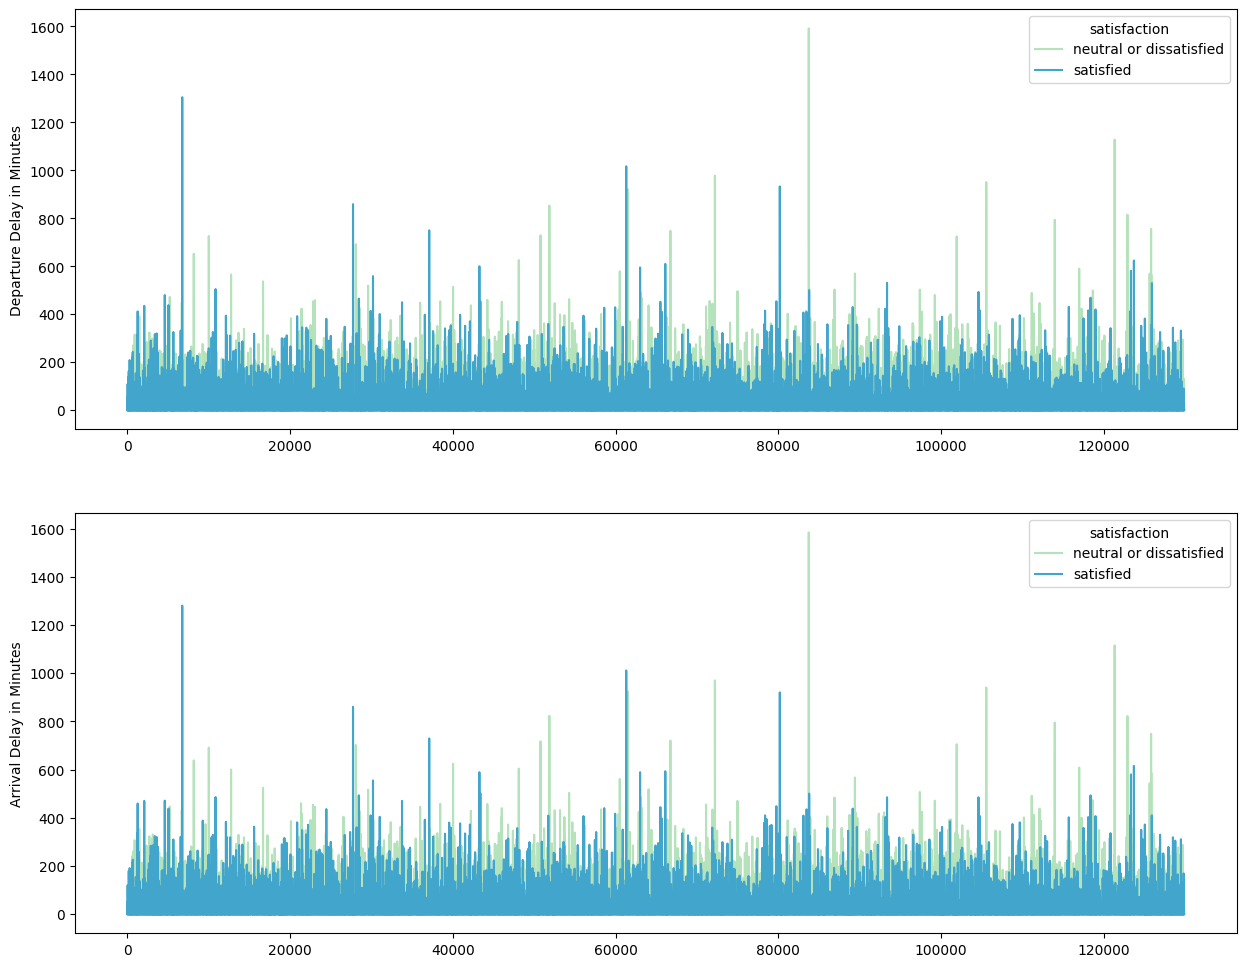

In [15]:
fig, axes = plt.subplots(len(col_2), 1, figsize=(15, 12))

for i, col in enumerate(col_2):
  sns.lineplot(data=df_concat, y=col, x=range(len(df_concat)), ax=axes[i], hue='satisfaction', palette='GnBu')

pass

From the above plots, we can conclude that:
- The age group between 40 to 60 shows a higher proportion of satisfied customers compared to younger and older passengers.
- Younger passengers (under 40) and passengers older than 60 have a higher proportion of neutral or dissatisfied responses.
- For short to medium distances (0 to 2000 km), there is a balanced distribution between satisfied and neutral/dissatisfied customers.
- Longer flights (above 2000 km) tend to have a higher proportion of neutral or dissatisfied passengers.
- Passengers who experienced long delays in both departure and arrival times show a higher tendency to be neutral or dissatisfied.
- Satisfied passengers seem to experience fewer significant delays, as seen from the distribution.

Now let's visualize the relationship between the categorical features and the target variable.

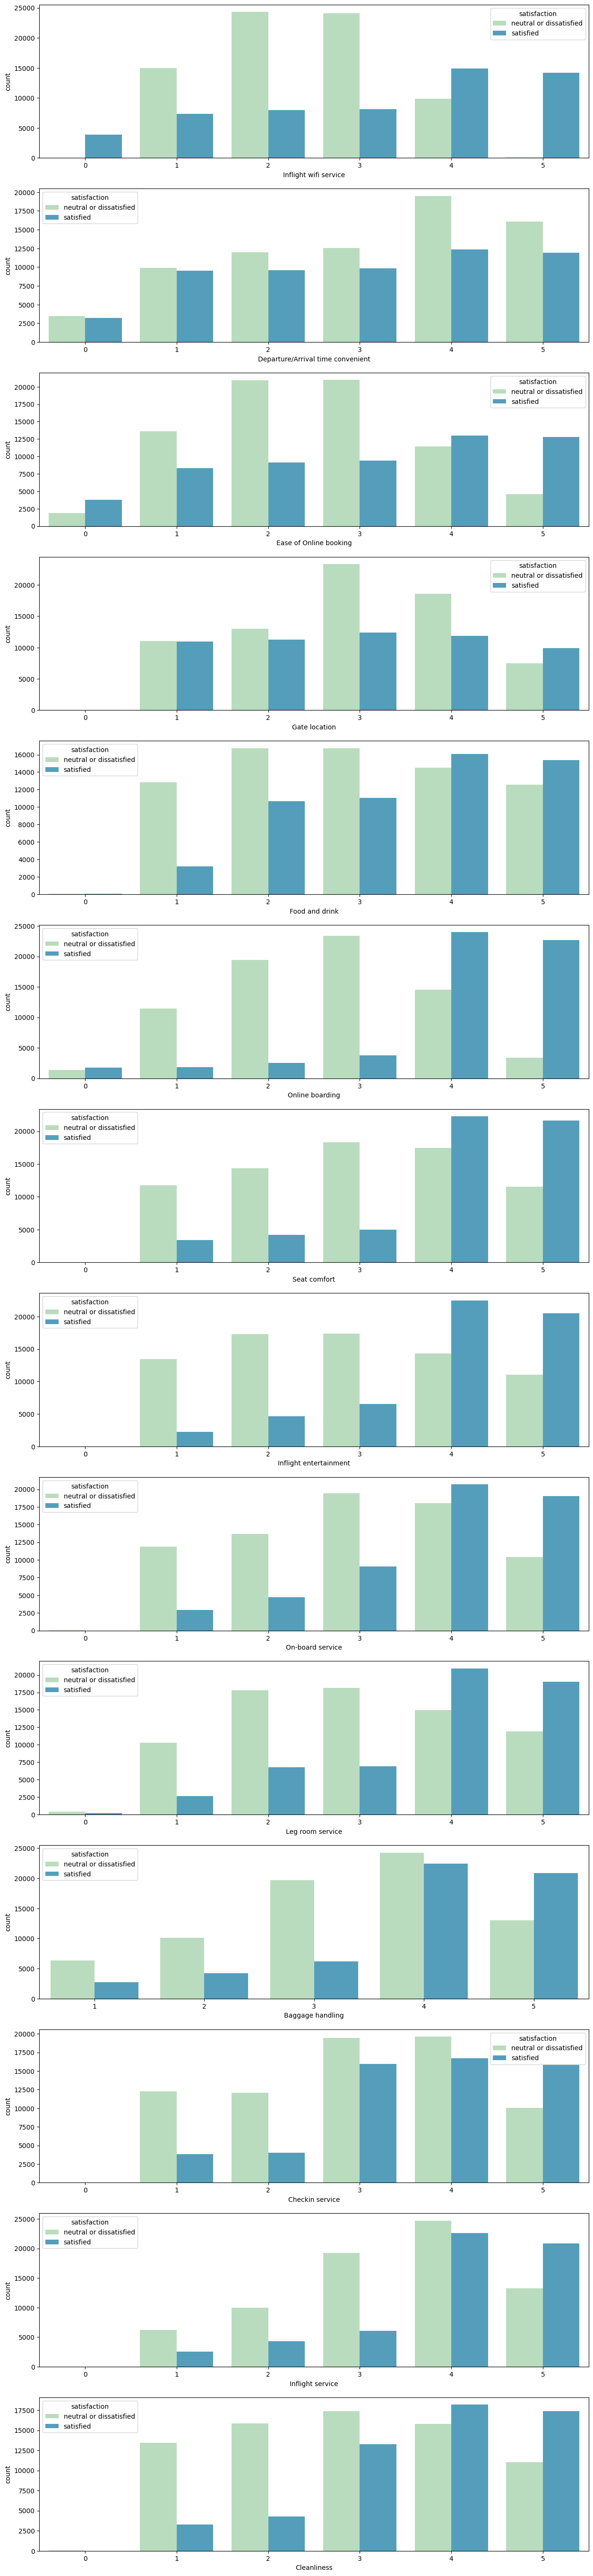

In [16]:
n_subplot = len(categorical_columns[4:])
fig, axes = plt.subplots(n_subplot, 1, figsize=(15, 70))

for i, col in enumerate(df_concat.columns[categorical_columns[4:]]):
  sns.countplot(data=df_concat, x=col, ax=axes[i], hue='satisfaction', palette='GnBu')

pass

From the above plots, we can conclude that:
Here’s the revised detailed conclusion without the categories:

- Passengers who rated the inflight WiFi service higher (4-5) are predominantly satisfied, while lower ratings (0-2) are associated with a higher proportion of neutral or dissatisfied passengers.
- Higher ratings (4-5) for time convenience show a larger proportion of satisfied passengers, indicating that the convenience of departure and arrival times strongly influences satisfaction. Lower ratings lead to dissatisfaction.
- Satisfied passengers are more common among those who rated ease of booking 4-5. Dissatisfaction rises with lower ratings (0-1), showing that an easy booking process is a key factor in satisfaction.
- Ratings of 4-5 for gate location also correspond to higher satisfaction levels, with lower ratings aligning with dissatisfaction, suggesting that the gate's convenience is important to passengers.
- Passengers who rated food and drink highly (4-5) tend to be more satisfied, whereas dissatisfaction dominates among those giving lower ratings (0-2). 
- Online boarding appears to be a key differentiator, with high satisfaction corresponding to ratings of 4-5, while lower ratings (0-1) lead to more neutral or dissatisfied responses.
- Comfort significantly impacts satisfaction. Passengers who rated seat comfort highly (4-5) are generally satisfied, while low ratings (0-2) are associated with dissatisfaction.
- Higher ratings (4-5) for inflight entertainment lead to greater passenger satisfaction, while dissatisfaction increases with lower ratings (0-2).
- Satisfied passengers are more prevalent among those who rated onboard service highly (4-5), with dissatisfaction corresponding to lower ratings.
- Legroom service ratings also show a clear pattern, with high satisfaction linked to higher ratings (4-5) and neutral or dissatisfied responses more common at lower ratings (0-2).
- A higher rating for check-in services correlates with increased passenger satisfaction, while dissatisfaction prevails among those giving low ratings.
- Similar to other services, passengers who rated inflight service highly (4-5) are generally more satisfied, while lower ratings (0-2) lead to dissatisfaction.
- Cleanliness ratings of 4-5 correspond to higher satisfaction levels, whereas dissatisfaction is more frequent among passengers who gave lower ratings.

<div style="
  width: 100%;
  height: 30px;
  background: linear-gradient(to right, #5f99bd, #81babe);
  border-radius: 20px;
  display: flex;
  justify-content: center;
  align-items: center;
  color: black;
  font-size: 18px;
">Filling in missing values</div>

In [11]:
df_concat.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

Let's take a look at the distribution of the `Arrival Delay in Minutes` column.

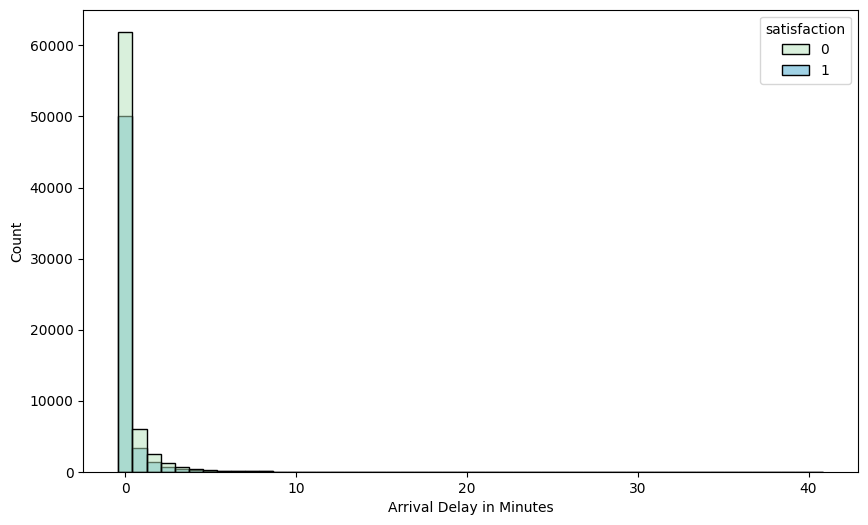

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_concat, x='Arrival Delay in Minutes', hue='satisfaction', palette='GnBu', bins=78)

pass

We can see that the distribution is right-skewed, so we will fill in the missing values with the median. Median is used because it is less sensitive to outliers.

In [13]:
df_concat.fillna({'Arrival Delay in Minutes': df_concat['Arrival Delay in Minutes'].median()}, inplace=True)

df_concat.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

<div style="
  width: 100%;
  height: 30px;
  background: linear-gradient(to right, #5f99bd, #81babe);
  border-radius: 20px;
  display: flex;
  justify-content: center;
  align-items: center;
  color: black;
  font-size: 18px;
">Handling categorical features</div>

Here, we define a function to convert the categorical features to numerical values, based on the provided mapping.

In [14]:
def replaceCategorial(df: pd.DataFrame, column: str, mapping: dict) -> None:
  df[column] = df[column].map(mapping)

We then map the labels to numerical values based on the provided mapping.

In [15]:
replaceCategorial(df_concat, 'Gender',         {'Male': 0, 'Female': 1})
replaceCategorial(df_concat, 'Customer Type',  {'disloyal Customer': 0, 'Loyal Customer': 1})
replaceCategorial(df_concat, 'Type of Travel', {'Personal Travel': 0, 'Business travel': 1})
replaceCategorial(df_concat, 'Class',          {'Eco': 0, 'Eco Plus': 1, 'Business': 2})
replaceCategorial(df_concat, 'satisfaction',   {'neutral or dissatisfied': 0, 'satisfied': 1})

df_concat.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,13,0,1,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,0,25,1,2,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,1,26,1,2,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,1,25,1,2,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,0,1,61,1,2,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


<div style="
  width: 100%;
  height: 30px;
  background: linear-gradient(to right, #5f99bd, #81babe);
  border-radius: 20px;
  display: flex;
  justify-content: center;
  align-items: center;
  color: black;
  font-size: 18px;
">Normalization of quantitative features</div>

In [16]:
numerical_columns = [c for c in df_concat.columns if df_concat[c].dtype != 'category']
numerical_columns.remove('satisfaction')
numerical_columns

['Age',
 'Flight Distance',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

We will perform standardization on the quantitative features. Standardization transforms the data to have a mean of 0 and a standard deviation of 1.

In [17]:
scaler = StandardScaler()
df_concat[numerical_columns] = scaler.fit_transform(df_concat[numerical_columns])

df_concat.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,-1.747961,0,1,-0.732184,3,4,3,1,...,5,4,3,4,4,5,5,0.270187,0.076909,0
1,0,0,-0.954274,1,2,-0.957760,3,2,3,3,...,1,1,5,3,1,4,1,-0.360214,-0.235460,0
2,1,1,-0.888133,1,2,-0.048440,2,2,2,2,...,5,4,3,4,4,4,5,-0.386481,-0.391644,1
3,1,1,-0.954274,1,2,-0.629924,2,5,5,5,...,2,2,5,3,1,4,2,-0.097547,-0.157368,0
4,0,1,1.426788,1,2,-0.978814,3,3,3,3,...,3,3,4,4,3,3,3,-0.386481,-0.391644,1


<div style="
  width: 100%;
  height: 30px;
  background: linear-gradient(to right, #5f99bd, #81babe);
  border-radius: 20px;
  display: flex;
  justify-content: center;
  align-items: center;
  color: black;
  font-size: 18px;
">Dataset Split</div>

In [18]:
X = df_concat.drop('satisfaction', axis=1).values
y = df_concat['satisfaction'].values

Train-test split is performed with a test size of 0.2.

Train-validation split is performed with a validation size of 0.2.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42327)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42239435)

print(
  f"Train: {X_train.shape}, {y_train.shape}\n"
  f"Val: {X_val.shape}, {y_val.shape}\n"
  f"Test: {X_test.shape}, {y_test.shape}"
)

Train: (83123, 22), (83123,)
Val: (20781, 22), (20781,)
Test: (25976, 22), (25976,)


<div style="
  width: 100%;
  height: 30px;
  background: linear-gradient(to right, #5f99bd, #81babe);
  border-radius: 20px;
  display: flex;
  justify-content: center;
  align-items: center;
  color: black;
  font-size: 18px;
">Hyperparameter Tuning</div>

In [57]:
class Model(kt.HyperModel):
  def build(self, hp: kt.HyperParameters):
    hp_layer         = hp.Int('num_layers', min_value=4, max_value=5)
    hp_units         = lambda i: hp.Int(f'units_{i}', min_value=16, max_value=64, step=16)
    hp_activation    = lambda i: hp.Choice(f'activation_{i}', ['relu', 'tanh', 'sigmoid', 'leaky_relu'])
    hp_dropout       = lambda i: hp.Float(f'dropout_{i}', min_value=0, max_value=0.5, step=0.1)
    hp_learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=3e-4, sampling='linear')

    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(units=X_train.shape[1], activation='sigmoid'))
    model.add(BatchNormalization())

    for i in range(hp_layer):
      model.add(Dense(units=hp_units(i+1), activation=hp_activation(i+1)))
      model.add(BatchNormalization())
      model.add(Dropout(hp_dropout(i+1)))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=hp_learning_rate), loss=BinaryCrossentropy(),
                  metrics=['accuracy'])

    return model

  def fit(self, hp: kt.HyperParameters, model: keras.Model, *args, **kwargs):
    hp_batch = hp.Int('batch_size', 256, 512, step=128)

    return model.fit(
      *args,
      batch_size=hp_batch,
      **kwargs,
    )

In [58]:
project_name = 'airline_satisfaction'
directory = f'./{project_name}'

if os.path.exists(directory):
  shutil.rmtree(directory)
  os.makedirs(directory)

tuner = kt.Hyperband(
  Model(),
  objective='val_accuracy',
  max_epochs=250,
  factor=10,
  project_name=project_name,
)

tuner.search_space_summary()

Search space summary
Default search space size: 14
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 4, 'step': 1, 'sampling': 'linear'}
learning_rate (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.0003, 'step': None, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 64, 'step': 16, 'sampling': 'linear'}
activation_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid', 'leaky_relu'], 'ordered': False}
dropout_1 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 64, 'step': 16, 'sampling': 'linear'}
activation_2 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid', 'leaky_relu'], 'ordered': False}
dropout_2 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 

In [59]:
tuner_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

tuner.search(X_train, y_train, validation_data=(X_val, y_val), callbacks=[tuner_callback])

Trial 176 Complete [00h 00m 42s]
val_accuracy: 0.9484625458717346

Best val_accuracy So Far: 0.9605889916419983
Total elapsed time: 00h 32m 05s


<div style="
  width: 100%;
  height: 30px;
  background: linear-gradient(to right, #5f99bd, #81babe);
  border-radius: 20px;
  display: flex;
  justify-content: center;
  align-items: center;
  color: black;
  font-size: 18px;
">Neural Network</div>

Based on the hyperparameter tuning, the best parameters are:

In [60]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps.values

{'num_layers': 4,
 'learning_rate': 0.00024904150980174994,
 'units_1': 64,
 'activation_1': 'tanh',
 'dropout_1': 0.0,
 'units_2': 48,
 'activation_2': 'relu',
 'dropout_2': 0.2,
 'units_3': 64,
 'activation_3': 'relu',
 'dropout_3': 0.1,
 'units_4': 64,
 'activation_4': 'tanh',
 'dropout_4': 0.0,
 'batch_size': 384,
 'tuner/epochs': 250,
 'tuner/initial_epoch': 25,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0147'}

Next, we will train the neural network model with the best parameters.

In [69]:
model_tuned = tuner.hypermodel.build(best_hps)
model_tuned.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 22)             │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         1,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 48)             │         3,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 48)             │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,507 (52.76 KB)

 Trainable params: 12,983 (50.71 KB)

 Non-trainable params: 524 (2.05 KB)

In [70]:
callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

model_tuned.compile(optimizer=Adam(learning_rate=best_hps.get('learning_rate')), loss=BinaryCrossentropy(), metrics=['accuracy'])

history = model_tuned.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, batch_size=best_hps.get('batch_size'), callbacks=[callback])

Epoch 1/500
217/217 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7171 - loss: 0.5569 - val_accuracy: 0.6447 - val_loss: 0.6950
Epoch 2/500
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8727 - loss: 0.2994 - val_accuracy: 0.8251 - val_loss: 0.4109
Epoch 3/500
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8970 - loss: 0.2485 - val_accuracy: 0.8958 - val_loss: 0.2509
Epoch 4/500
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9097 - loss: 0.2193 - val_accuracy: 0.9181 - val_loss: 0.1969
Epoch 5/500
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9188 - loss: 0.1975 - val_accuracy: 0.9308 - val_loss: 0.1704
Epoch 6/500
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9229 - loss: 0.1859 - val_accuracy: 0.9344 - val_loss: 0.1588
Epoch 7/500
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9259 - loss: 0.1772 - val_accuracy: 0.9362 - val_loss: 0.1540
Epoch 8/500
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9304 - loss: 0.1675 - val_accu

<div style="
  width: 100%;
  height: 30px;
  background: linear-gradient(to right, #5f99bd, #81babe);
  border-radius: 20px;
  display: flex;
  justify-content: center;
  align-items: center;
  color: black;
  font-size: 18px;
">Model Evaluation</div>

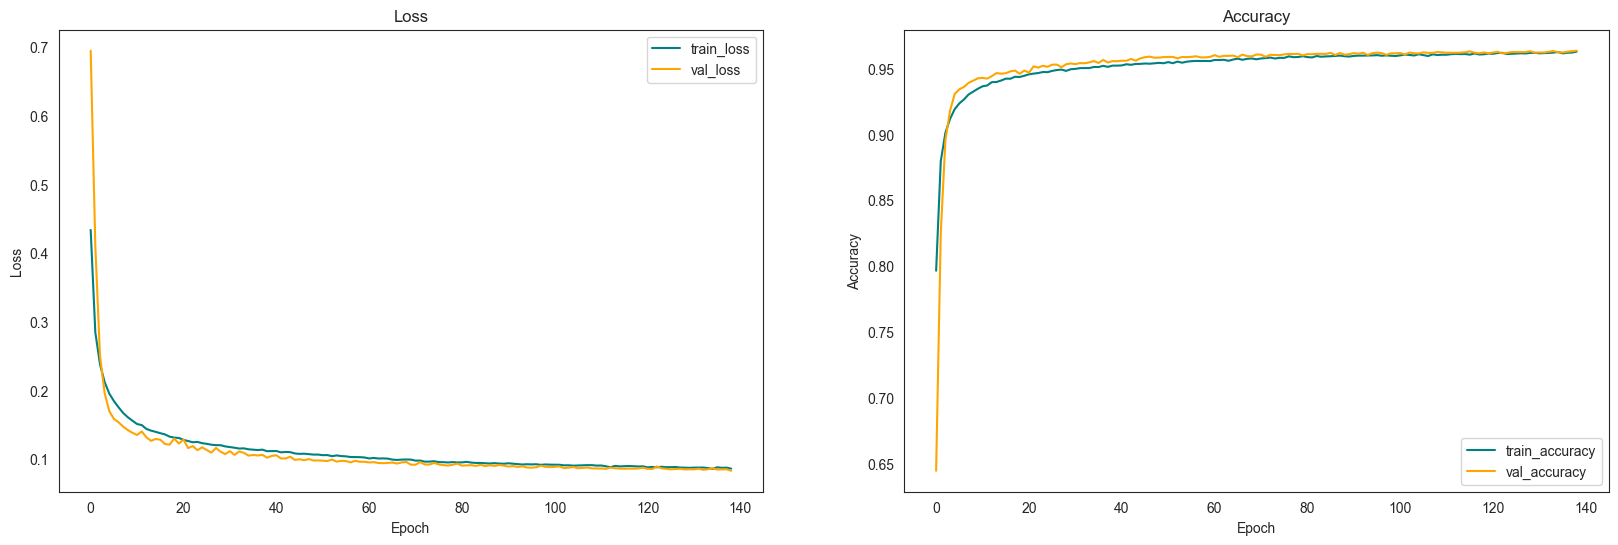

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

ax[0].plot(history.history['loss'][:-10], color = 'teal', label = 'train_loss')
ax[0].plot(history.history['val_loss'][:-10], color = 'orange', label = 'val_loss')
ax[0].title.set_text('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend(loc='upper right')

ax[1].plot(history.history['accuracy'][:-10], color = 'teal', label = 'train_accuracy')
ax[1].plot(history.history['val_accuracy'][:-10], color = 'orange', label = 'val_accuracy')
ax[1].title.set_text('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend(loc='lower right')

pass

From the plots above, we can see that the model is performing well, there is no overfitting, and the loss is decreasing while the accuracy is increasing.

In [72]:
loss, accuracy = model_tuned.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.9665 - loss: 0.0803
Loss: 0.08413806557655334, Accuracy: 0.9642747044563293


In [73]:
score_dict = {}
pred = (model_tuned.predict((X_test, y_test)) > 0.5).astype(int)

print(classification_report(pred, y_test))

score_dict['model'] = {
  'accuracy': accuracy_score(y_test, pred),
  'precision': precision_score(y_test, pred),
  'recall': recall_score(y_test, pred),
  'f1_score': f1_score(y_test, pred),
}

for key, value in score_dict['model'].items():
  print(f"{key:<10}: {value}")

812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 908us/step
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     15077
           1       0.94      0.97      0.96     10899

    accuracy                           0.96     25976
   macro avg       0.96      0.97      0.96     25976
weighted avg       0.96      0.96      0.96     25976

accuracy  : 0.9642747151216507
precision : 0.9716487751169832
recall    : 0.9447765188687661
f1_score  : 0.958024244617333


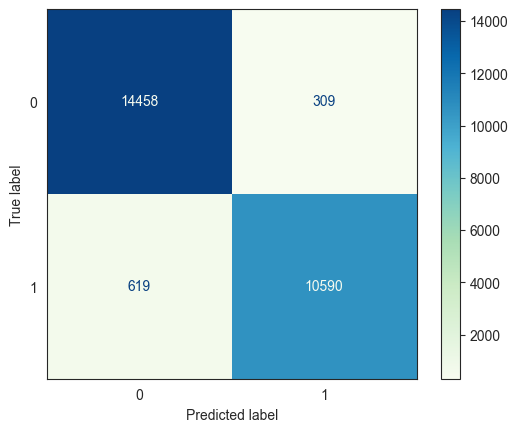

In [74]:
sns.set_style('white')
ConfusionMatrixDisplay.from_predictions(y_test, pred, values_format='d', cmap='GnBu')

keras.backend.clear_session()

<div style="
  width: 100%;
  height: 30px;
  background: linear-gradient(to right, #5f99bd, #81babe);
  border-radius: 20px;
  display: flex;
  justify-content: center;
  align-items: center;
  color: black;
  font-size: 18px;
">Conclusion</div>

- The model is performing well, with an accuracy of 96.427%, precision of 97.165%, recall of 94.478%, and F1 score of 95.802%.
- The model is not overfitting, as the loss is decreasing while the accuracy is increasing.
- Confusion matrix shows a high number of true positives and true negatives and a low number of false positives and false negatives.
- The amount of false negatives might have been caused by the skewedness of some features, such as the `Arrival Delay in Minutes` column. The skewedness might have caused the model to predict a lower number of neutral or dissatisfied passengers beacuse the value with high frequency is dominated by class 0.